# Cluster comparison: TCR vs. Tucker
This file compares both clustering results on Tucker decomposition and on TCR metrics data. 


To assess the similarity between two clustering results, we use the **Normalized Mutual Information (NMI)** score from `sklearn.metrics`. NMI quantifies the amount of mutual dependence between the two clusterings, adjusted for chance. NMI ranges from **0** (no mutual information) to **1** (perfect agreement), and is invariant to label permutations.

We use this metric to compare clusterings derived from different input features — for example, repertoire diversity metrics vs. tensor decomposition.

>Source: Scikit-learn documentation  
> [`sklearn.metrics.normalized_mutual_info_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)


## Imports

In [ ]:
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [30]:
plt.rcParams.update({
    "font.size": 15,       # Default text size
    "axes.titlesize": 17,  # Title size
    "axes.labelsize": 15,  # X and Y label size
    "xtick.labelsize": 12, # X tick labels
    "ytick.labelsize": 13, # Y tick labels
    "legend.fontsize": 15,  # Legend text size
    "lines.linewidth": 3  # Increase line thickness
})

## Numerical comparison

In [35]:
# Define tensor-specific k ranges
tensor_k_ranges = {
    'tensor_70': range(1, 10),
    'tensor_100': range(1, 10),
    'tensor_200': range(1, 10),
    'tensor_300': range(1, 7)
}

# Collect NMI scores
nmi_results = []

# Loop over tensors and k values
for tensor, k_range in tensor_k_ranges.items():
    for k in k_range:
        try:
            # File paths
            tcr_path = f'Clust_Results/labels_TCR_metrics_{tensor}_k{k}.csv'
            tucker_path = f'Clust_Results/labels_Tucker_{tensor}_k{k}.csv'

            # Load CSVs
            tcr = pd.read_csv(tcr_path)
            tucker = pd.read_csv(tucker_path)

            # Merge and compute NMI
            merged = pd.merge(tcr, tucker, on='patient', suffixes=('_tcr', '_tucker'))
            nmi = normalized_mutual_info_score(merged['cluster_tcr'], merged['cluster_tucker'])

            # Store result
            nmi_results.append({
                'tensor': tensor,
                'k': k,
                'nmi': nmi
            })

            print(f"{tensor} | k={k} | NMI = {nmi:.4f}")

        except FileNotFoundError as e:
            print(f"Skipping {tensor} k={k}: {e}")

# Convert to DataFrame
nmi_df = pd.DataFrame(nmi_results)
nmi_df.to_csv('nmi_comparison_all_tensors.csv', index=False)


tensor_70 | k=1 | NMI = 1.0000
tensor_70 | k=2 | NMI = 0.0008
tensor_70 | k=3 | NMI = 0.2138
tensor_70 | k=4 | NMI = 0.5359
tensor_70 | k=5 | NMI = 0.4955
tensor_70 | k=6 | NMI = 0.5325
tensor_70 | k=7 | NMI = 0.6442
tensor_70 | k=8 | NMI = 0.6939
tensor_70 | k=9 | NMI = 0.7579
tensor_100 | k=1 | NMI = 1.0000
tensor_100 | k=2 | NMI = 0.0501
tensor_100 | k=3 | NMI = 0.2457
tensor_100 | k=4 | NMI = 0.3945
tensor_100 | k=5 | NMI = 0.4765
tensor_100 | k=6 | NMI = 0.5505
tensor_100 | k=7 | NMI = 0.7064
tensor_100 | k=8 | NMI = 0.8247
tensor_100 | k=9 | NMI = 0.9294
tensor_200 | k=1 | NMI = 1.0000
tensor_200 | k=2 | NMI = 0.0680
tensor_200 | k=3 | NMI = 0.2993
tensor_200 | k=4 | NMI = 0.4232
tensor_200 | k=5 | NMI = 0.6587
tensor_200 | k=6 | NMI = 0.6512
tensor_200 | k=7 | NMI = 0.8188
tensor_200 | k=8 | NMI = 0.9246
tensor_200 | k=9 | NMI = 1.0000
tensor_300 | k=1 | NMI = 1.0000
tensor_300 | k=2 | NMI = 0.0745
tensor_300 | k=3 | NMI = 0.5679
tensor_300 | k=4 | NMI = 0.5579
tensor_300 | k=5 

## Plots

In [36]:
def save_figure(fig, file_prefix,foldername=None):
    current_path = os.getcwd()
    if foldername==None:
        save_folder = os.path.join(current_path, f'Results/Clust Comparison')
    else:
        save_folder = os.path.join(current_path, f'Results/Clust Comparison/{foldername}')
    os.makedirs(save_folder, exist_ok=True)
    png_path = os.path.join(save_folder, f"{file_prefix}.png")
    pdf_path = os.path.join(save_folder, f"{file_prefix}.pdf")
    fig.savefig(png_path, bbox_inches='tight')
    fig.savefig(pdf_path, bbox_inches='tight')


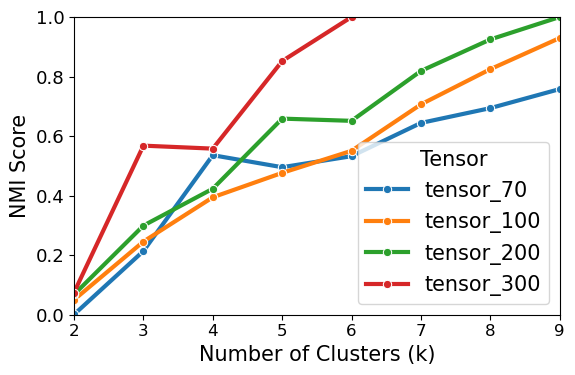

In [37]:
# Load the NMI results
nmi_df = pd.read_csv('nmi_comparison_all_tensors.csv')

# Plot NMI vs k for each tensor
fig = plt.figure(figsize=(6, 4))
sns.lineplot(data=nmi_df, x='k', y='nmi', hue='tensor', marker='o')

# plt.title('Normalized Mutual Information (NMI) Between Tucker and TCR Metric Clusterings')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('NMI Score')
plt.ylim(0, 1)
plt.xlim(2, 9)
# plt.grid(True)
plt.legend(title='Tensor', loc='best')
plt.tight_layout()
save_figure(fig, 'NMI_for_k_all_tensors',foldername=None)
plt.show()
